In [43]:
# import utilities and plotting
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

# import our code that we need
import fixed_center_of_mass_exact as fcm
from davidson import solve_davidson
from constants import *
from hamiltonian import solve_BO_surface

# don't use too many cores
from pyscf import lib as pyscflib
pyscflib.num_threads(16)

16

In [2]:
# set up the calculation
args = Namespace(
    M_1 = 1e9,
    M_2 = 500,
    g_1 = 1.0,
    g_2 = 0.4,
    NR = 101,
    Nr = 400,
    extent = np.array([2,4,-4,0]),
)

# build the terms in the Hamiltonian
TR, Tr, Tmp, Vgrid, (R,P), (r,p) = fcm.build_terms(args)

# solve the BO surfaces
surfs = solve_BO_surface(Tr + Tmp, Vgrid)

# solve the full system
conv, e_approx, evecs = solve_davidson(TR, Tr + Tmp, Vgrid, num_state=5)

Elapsed time: 3.7839704006910324s
Davidson will consume up to 143912MB of memory.
Elapsed time: 46.97435526549816s


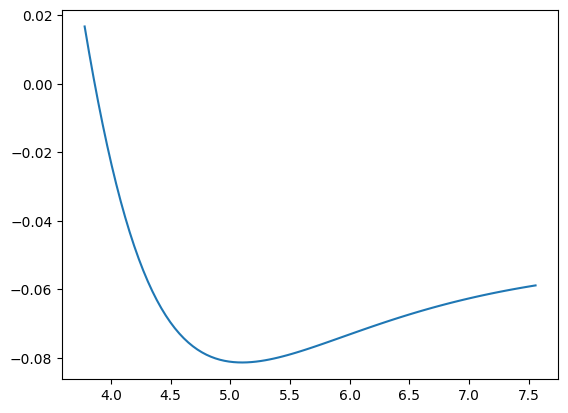

In [46]:
plt.plot(R, surfs)


(-4.0, -1.0)

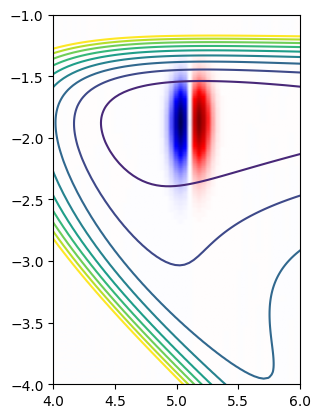

In [40]:
# plot the potential and the first excited wavefunction (with phase information)
levels = np.linspace(np.min(Vgrid), 0.08, 10)
plt.contour(*np.meshgrid(R, r, indexing='ij'), Vgrid, levels=levels)
psi = evecs[1].reshape(args.NR,args.Nr)
limit = np.max(np.abs(psi))
plt.imshow(psi.T, extent=(args.extent * ANGSTROM_TO_BOHR), origin='lower', cmap='seismic', vmin=-limit, vmax=limit)
plt.xlim(4,6)
plt.ylim(-4,-1)